## Final Project Submission

Please fill out:
* Student name: Yesim Cebeci
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Matt Carr
* Blog post URL:


# Overview 

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.I am charged with exploring what types of films are currently doing the best at the box office.I must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

In this analysis, I will perform an analysis on a large data set of approximately 3,000
movies. The data includes many different types of information about each movie, ranging from
the  the director, the studio, the genre to other information like the budget, the box office
earnings from different datas. I will analyze this data set to
determine what contributes to a movie being a “success”. For this analysis, I will define success
in financial terms, basing the success of a movie on the amount of money it earns in
comparison to the movie’s budget.

# Business Problem 

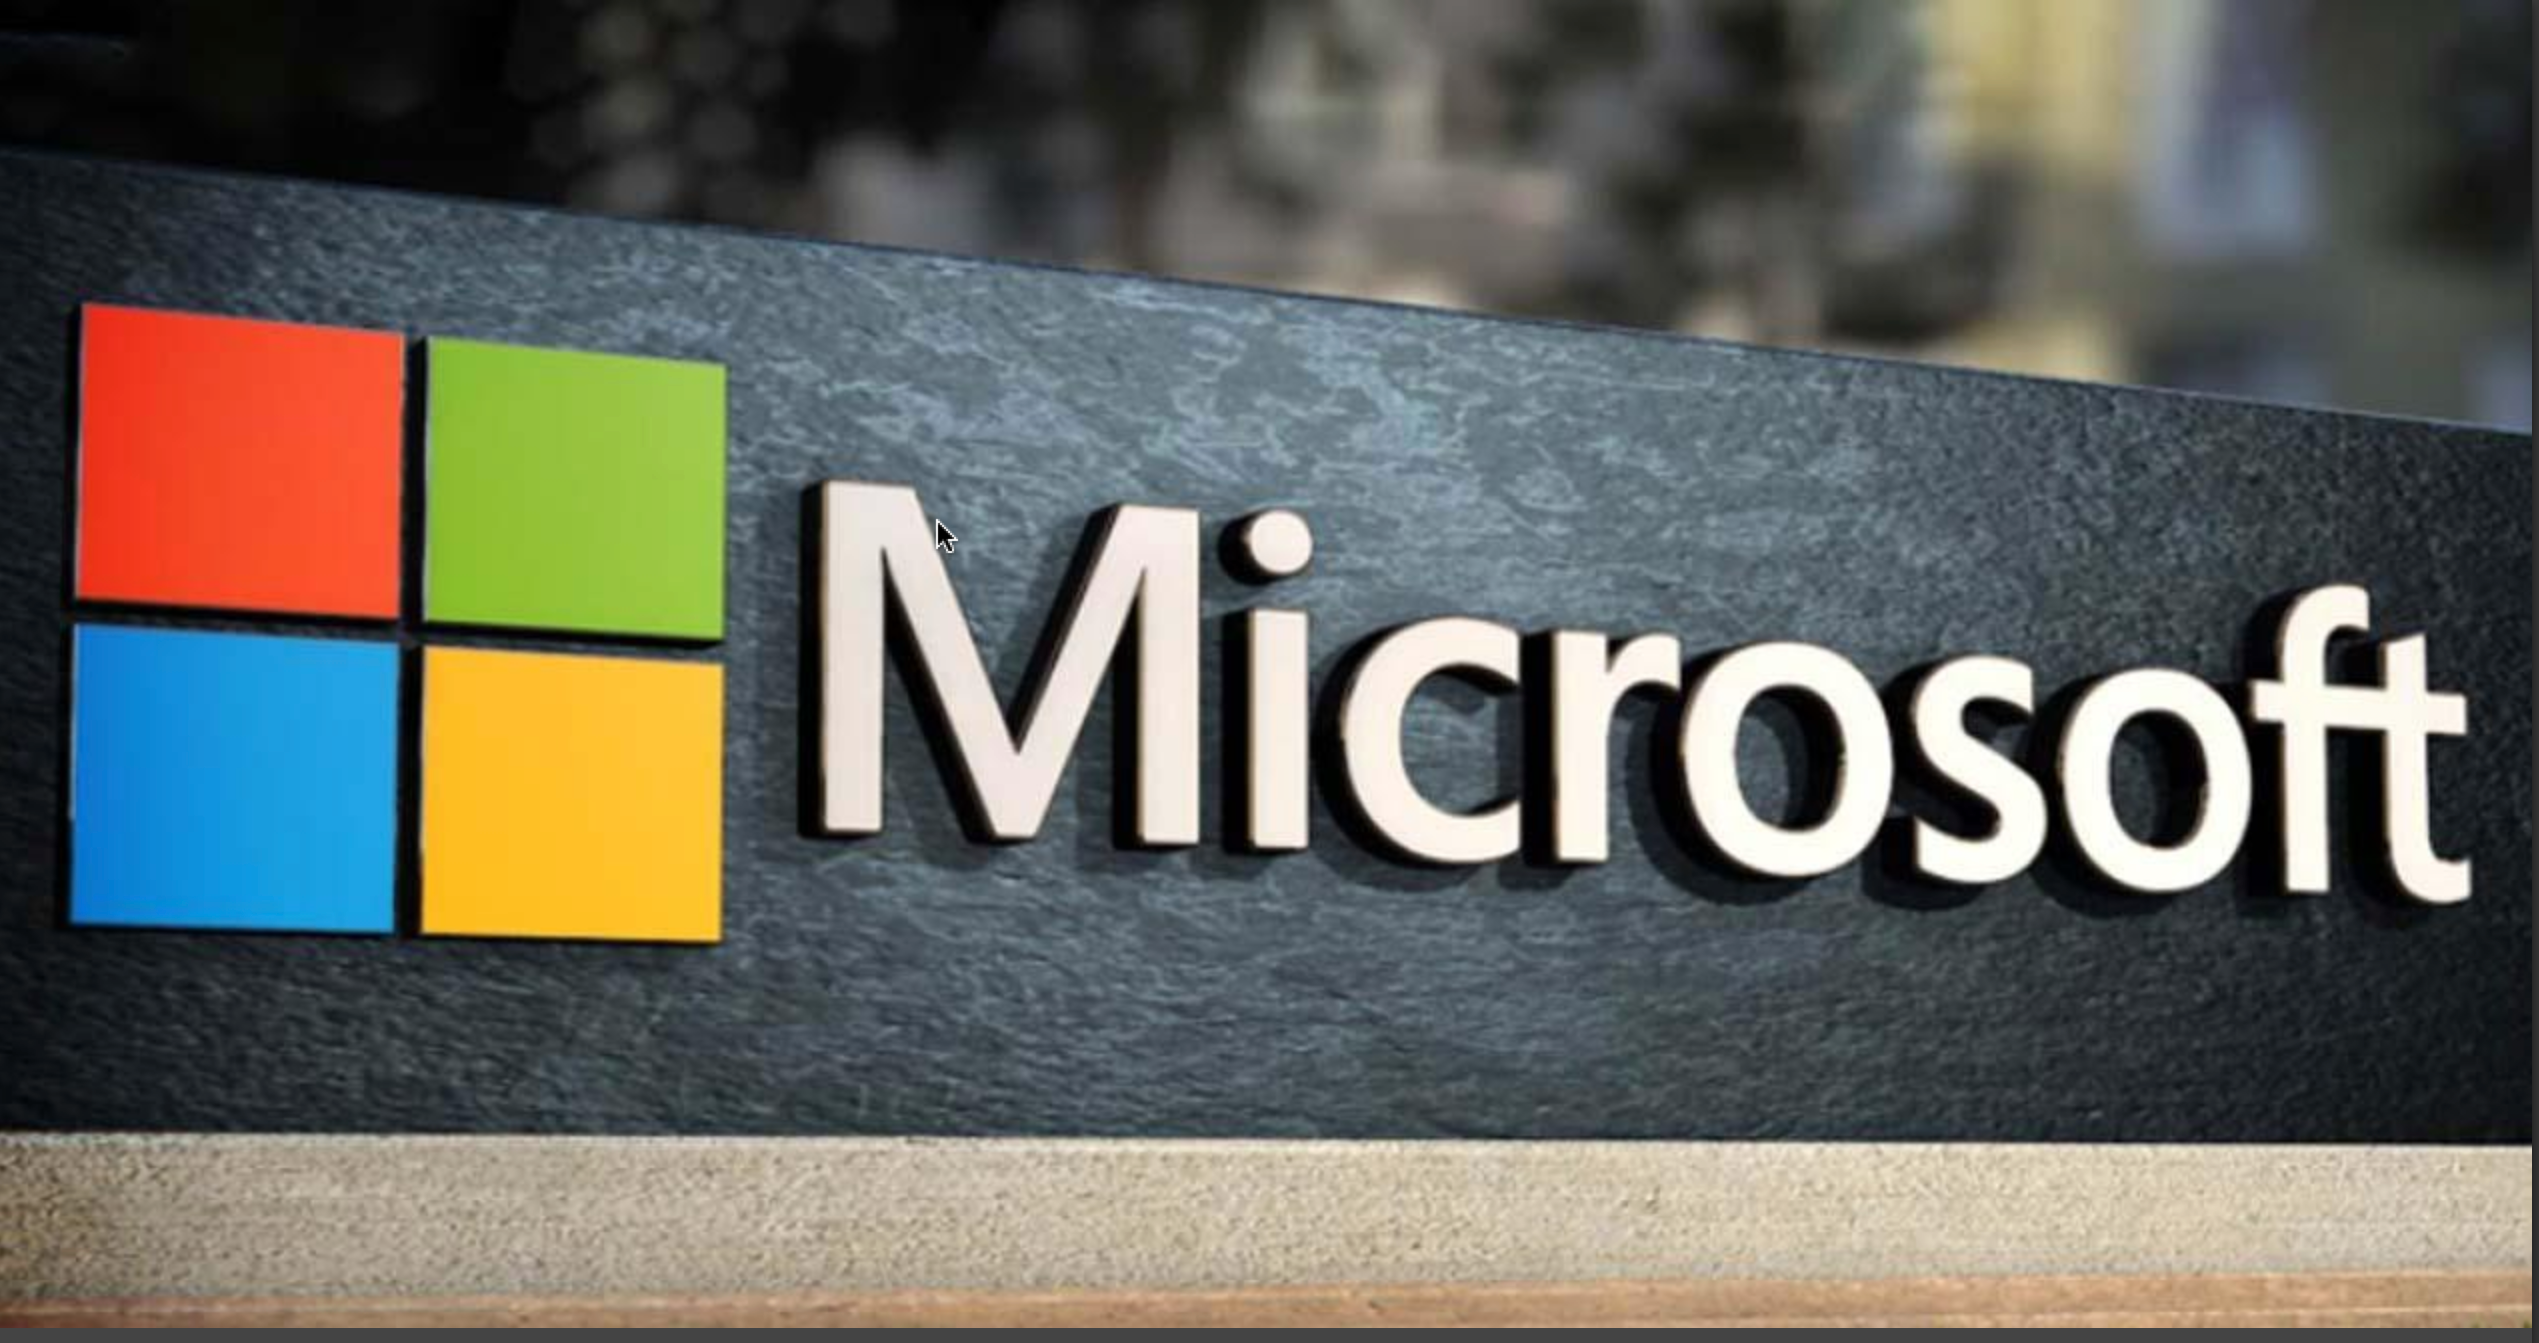

The datasets for this analysis was provided to me from imbd , rotten tomatoes and box office mojo websites. The
original datasets contained information about 11 data files which have more then 100000 data movies. I decided to use 6 different datasets and decided to focus on three categories:
1) Genres 2) Studios 3) Directors

For those 3 catagories I decided to sort by ROI, Budget and Numbers to make some prediction and recommendation

<img src="movie.png" style="width: 200px; height: 5px;" />

# Data Understanding 

I will start by importing all the necessary libraries and loading data files  to start understanding datas

In [887]:
import pandas as pd 
import numpy as np

In [888]:
# I will use this dataset to get movies and genres data
imdb_title_basics=pd.read_csv('./Data/imdb.title.basics.csv.gz')
imdb_title_basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy

In [889]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [890]:
imdb_title_basics.isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [891]:
imdb_title_basics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [892]:
# I will use this dataset to get director names (primary_name) and primary_profession data
imdb_name_basic=pd.read_csv('./Data/imdb.name.basics.csv')
imdb_name_basic.head()

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                 primary_profession  \
0         miscellaneous,production_manager,producer   
1        composer,music_department,sound_department   
2                        miscellaneous,actor,writer   
3  camera_department,cinematographer,art_department   
4  production_designer,art_department,set_decorator   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [893]:
imdb_name_basic['primary_name'].value_counts()

Michael Brown          16
James Brown            16
David Brown            15
Michael Johnson        14
Dinesh                 13
                       ..
Glenn German            1
Clifford Fields         1
Joanna Perry-Folino     1
Stefan Hahn             1
Pegasus Envoyé          1
Name: primary_name, Length: 577203, dtype: int64

In [894]:
# I will need this dataset later to merge tables for director name!
imdb_title_principals=pd.read_csv('./Data/imdb.title.principals.csv.gz')
imdb_title_principals.head()

tconst  ordering     nconst  category       job        characters
0  tt0111414         1  nm0246005     actor       NaN       ["The Man"]
1  tt0111414         2  nm0398271  director       NaN               NaN
2  tt0111414         3  nm3739909  producer  producer               NaN
3  tt0323808        10  nm0059247    editor       NaN               NaN
4  tt0323808         1  nm3579312   actress       NaN  ["Beth Boothby"]

In [895]:
# I will use this dataset for studios
bom_movie_gross=pd.read_csv('./Data/bom.movie_gross.csv')
bom_movie_gross.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [896]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [897]:
bom_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [898]:
bom_movie_gross['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 257, dtype: int64

In [899]:
# directors
imdb_title_crew=pd.read_csv('./Data/imdb.title.crew.csv.gz')
imdb_title_crew.head()

tconst                      directors              writers
0  tt0285252                      nm0899854            nm0899854
1  tt0438973                            NaN  nm0175726,nm1802864
2  tt0462036                      nm1940585            nm1940585
3  tt0835418                      nm0151540  nm0310087,nm0841532
4  tt0878654  nm0089502,nm2291498,nm2292011            nm0284943

In [900]:
#I ll use this dataset to calculate ROI, and will get production budget by movie  
movie_budget=pd.read_csv('./Data/tn.movie_budgets.csv')
movie_budget.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747

In [901]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Preparation

it looks some of 'genres' columns have several categories. First of all, l need to apply explode methods to split them. But before do that I used str.split method to make list them!

In [902]:
imdb_title_basics['genres']=imdb_title_basics['genres'].map(str)
imdb_title_basics['genres']=imdb_title_basics['genres'].str.split(",")
imdb_title_basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                    genres  
0        2013            175.0    [Action, Crime, Drama]  
1        2019            114.0        [Biography, Drama]  
2        2018            122.0                   [Drama]  
3        2018              NaN           [Comedy, Drama]  
4        2017             80.0  [Comedy, Drama, Fantasy]

In [903]:
imdb_title_basics= imdb_title_basics.assign(genres=imdb_title_basics['genres'].explode('genres'))
imdb_title_basics.head()

tconst                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes     genres  
0        2013            175.0     Action  
1        2019            114.0      Crime  
2        2018            122.0      Drama  
3        2018              NaN  Biography  
4        2017             80.0      Drama

Same things for'directors' columns have several categories.l need to apply same methods for 'directors' column in order to merge table safely

In [904]:
imdb_title_crew['directors']=imdb_title_crew['directors'].map(str)
imdb_title_crew['directors']=imdb_title_crew['directors'].str.split(",")
imdb_title_crew.head()

tconst                          directors              writers
0  tt0285252                        [nm0899854]            nm0899854
1  tt0438973                              [nan]  nm0175726,nm1802864
2  tt0462036                        [nm1940585]            nm1940585
3  tt0835418                        [nm0151540]  nm0310087,nm0841532
4  tt0878654  [nm0089502, nm2291498, nm2292011]            nm0284943

In [905]:
imdb_title_crew= imdb_title_crew.assign(directors=imdb_title_crew['directors'].explode('directors'))
imdb_title_crew.head()

tconst  directors              writers
0  tt0285252  nm0899854            nm0899854
1  tt0438973        nan  nm0175726,nm1802864
2  tt0462036  nm1940585            nm1940585
3  tt0835418  nm0151540  nm0310087,nm0841532
4  tt0878654  nm0089502            nm0284943

And also I applied same method for primary proffesion column. Then in this column I ll extract 'director' to get only director's name

In [906]:
imdb_name_basic['primary_profession'] = imdb_name_basic['primary_profession'].map(str)
imdb_name_basic['primary_profession'] = imdb_name_basic['primary_profession'].str.split(",")
imdb_name_basic.head()

nconst       primary_name  birth_year  death_year  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN   
1  nm0061865       Joseph Bauer         NaN         NaN   
2  nm0062070         Bruce Baum         NaN         NaN   
3  nm0062195       Axel Baumann         NaN         NaN   
4  nm0062798        Pete Baxter         NaN         NaN   

                                  primary_profession  \
0      [miscellaneous, production_manager, producer]   
1     [composer, music_department, sound_department]   
2                     [miscellaneous, actor, writer]   
3  [camera_department, cinematographer, art_depar...   
4  [production_designer, art_department, set_deco...   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [907]:
imdb_name_basic = imdb_name_basic.assign(primary_profession=imdb_name_basic
                                        ['primary_profession'].explode('primary_profession'))
imdb_name_basic.head()

nconst       primary_name  birth_year  death_year  primary_profession  \
0  nm0061671  Mary Ellen Bauder         NaN         NaN       miscellaneous   
1  nm0061865       Joseph Bauer         NaN         NaN  production_manager   
2  nm0062070         Bruce Baum         NaN         NaN            producer   
3  nm0062195       Axel Baumann         NaN         NaN            composer   
4  nm0062798        Pete Baxter         NaN         NaN    music_department   

                          known_for_titles  
0  tt0837562,tt2398241,tt0844471,tt0118553  
1  tt0896534,tt6791238,tt0287072,tt1682940  
2  tt1470654,tt0363631,tt0104030,tt0102898  
3  tt0114371,tt2004304,tt1618448,tt1224387  
4  tt0452644,tt0452692,tt3458030,tt2178256

In [908]:
exploded_directors = imdb_name_basic[imdb_name_basic['primary_profession'].str.contains('director')]
exploded_directors.head(5)

nconst      primary_name  birth_year  death_year primary_profession  \
15  nm0066163    Arnaud Bedouët         NaN         NaN           director   
26  nm0069605  Bruno Beltramini         NaN         NaN           director   
41  nm0075049    Urban Bergsten         NaN         NaN           director   
43  nm0076139    Andrée Bernard      1966.0         NaN           director   
51  nm0081255    Andreas Bieber      1966.0         NaN           director   

                           known_for_titles  
15  tt1355327,tt1977735,tt0173525,tt1710520  
26  tt2154648,tt3746684,tt3746660,tt0427317  
41  tt4390908,tt2256570,tt6014434,tt8284860  
43  tt0112004,tt0104036,tt0103939,tt0081912  
51  tt1822255,tt1163326,tt0108985,tt0164630

In [909]:
exploded_directors['primary_profession'].value_counts()

director              70906
assistant_director     9553
art_director           2831
casting_director       1451
Name: primary_profession, dtype: int64

In [910]:
exploded_directors1 = imdb_name_basic[imdb_name_basic['primary_profession']== 'director']
exploded_directors1.head(5)

nconst      primary_name  birth_year  death_year primary_profession  \
15  nm0066163    Arnaud Bedouët         NaN         NaN           director   
26  nm0069605  Bruno Beltramini         NaN         NaN           director   
41  nm0075049    Urban Bergsten         NaN         NaN           director   
43  nm0076139    Andrée Bernard      1966.0         NaN           director   
51  nm0081255    Andreas Bieber      1966.0         NaN           director   

                           known_for_titles  
15  tt1355327,tt1977735,tt0173525,tt1710520  
26  tt2154648,tt3746684,tt3746660,tt0427317  
41  tt4390908,tt2256570,tt6014434,tt8284860  
43  tt0112004,tt0104036,tt0103939,tt0081912  
51  tt1822255,tt1163326,tt0108985,tt0164630

In [911]:
exploded_directors1['primary_profession'].value_counts()

director    70906
Name: primary_profession, dtype: int64

This budgets dataframe needs a little cleaning, getting rid of the dollar signs, converting type integer to calculate ROI

In [912]:
#convert the values to integer
movie_budget["worldwide_gross"] = movie_budget["worldwide_gross"].replace("[\$,]", "", regex=True).astype(int)
movie_budget["domestic_gross"] = movie_budget["domestic_gross"].replace("[\$,]", "", regex=True).astype(int)
movie_budget["production_budget"] = movie_budget["production_budget"].replace("[\$,]", "", regex=True).astype(int)
movie_budget.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0          425000000       760507625       2776345279  
1          410600000       241063875       1045663875  
2          350000000        42762350        149762350  
3          330600000       459005868       1403013963  
4          317000000       620181382       1316721747

In [913]:
#create a new column that calculates ROI (return on investment)
movie_budget["ROI"] = ((movie_budget["worldwide_gross"] - movie_budget["production_budget"]
                       )/movie_budget["production_budget"])*100
movie_budget.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross         ROI  
0          425000000       760507625       2776345279  553.257713  
1          410600000       241063875       1045663875  154.667286  
2          350000000        42762350        149762350  -57.210757  
3          330600000       459005868       1403013963  324.384139  
4          317000000       620181382       1316721747  315.369636

In [914]:
#I will extract year from date in case of need sorting by year
movie_budget['release_year'] = movie_budget['release_date'].str[-4:].astype(int)
movie_budget.head()

id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross         ROI  \
0          425000000       760507625       2776345279  553.257713   
1          410600000       241063875       1045663875  154.667286   
2          350000000        42762350        149762350  -57.210757   
3          330600000       459005868       1403013963  324.384139   
4          317000000       620181382       1316721747  315.369636   

   release_year  
0          2009  
1          2011  
2          2019  
3          2015  
4          2017

In [915]:
movie_budget = movie_budget[['release_year','movie', 'worldwide_gross','production_budget','ROI']]
movie_budget.head()

release_year                                        movie  worldwide_gross  \
0          2009                                       Avatar       2776345279   
1          2011  Pirates of the Caribbean: On Stranger Tides       1045663875   
2          2019                                 Dark Phoenix        149762350   
3          2015                      Avengers: Age of Ultron       1403013963   
4          2017            Star Wars Ep. VIII: The Last Jedi       1316721747   

   production_budget         ROI  
0          425000000  553.257713  
1          410600000  154.667286  
2          350000000  -57.210757  
3          330600000  324.384139  
4          317000000  315.369636

In [916]:
movie_budget.sort_values(by = "ROI", ascending = False, inplace = True)
movie_budget.head(10)

release_year                     movie  worldwide_gross  \
5745          1972               Deep Throat         45000000   
5613          1980                   Mad Max         99750000   
5492          2009       Paranormal Activity        194183034   
5679          2015               The Gallows         41656474   
5406          1999   The Blair Witch Project        248300000   
5709          2004             Super Size Me         22233808   
5346          1942                     Bambi        268000000   
5773          1993               El Mariachi          2041928   
5676          1968  Night of the Living Dead         30087064   
5210          1976                     Rocky        225000000   

      production_budget            ROI  
5745              25000  179900.000000  
5613             200000   49775.000000  
5492             450000   43051.785333  
5679             100000   41556.474000  
5406             600000   41283.333333  
5709              65000   34105.858462  
5346             858000   31135.431235  
5773               7000   29070.400000  
5676             114000   26292.161404  
5210            1000000   22400.000000

In [917]:
movie_budget.sort_values(by = "worldwide_gross", ascending = False, inplace = True)
movie_budget.head(10)

release_year                                          movie  \
0            2009                                         Avatar   
42           1997                                        Titanic   
5            2015           Star Wars Ep. VII: The Force Awakens   
6            2018                         Avengers: Infinity War   
33           2015                                 Jurassic World   
66           2015                                      Furious 7   
26           2012                                   The Avengers   
3            2015                        Avengers: Age of Ultron   
41           2018                                  Black Panther   
260          2011  Harry Potter and the Deathly Hallows: Part II   

     worldwide_gross  production_budget          ROI  
0         2776345279          425000000   553.257713  
42        2208208395          200000000  1004.104198  
5         2053311220          306000000   571.016739  
6         2048134200          300000000   582.711400  
33        1648854864          215000000   666.909239  
66        1518722794          190000000   699.327786  
26        1517935897          225000000   574.638176  
3         1403013963          330600000   324.384139  
41        1348258224          200000000   574.129112  
260       1341693157          125000000   973.354526

In [918]:
movie_budget.sort_values(by = "production_budget", ascending = False, inplace = True)
movie_budget.head(10)

release_year                                        movie  worldwide_gross  \
0          2009                                       Avatar       2776345279   
1          2011  Pirates of the Caribbean: On Stranger Tides       1045663875   
2          2019                                 Dark Phoenix        149762350   
3          2015                      Avengers: Age of Ultron       1403013963   
4          2017            Star Wars Ep. VIII: The Last Jedi       1316721747   
5          2015         Star Wars Ep. VII: The Force Awakens       2053311220   
8          2017                               Justice League        655945209   
9          2015                                      Spectre        879620923   
7          2007   Pirates of the Caribbean: At Worldâs End        963420425   
6          2018                       Avengers: Infinity War       2048134200   

   production_budget         ROI  
0          425000000  553.257713  
1          410600000  154.667286  
2          350000000  -57.210757  
3          330600000  324.384139  
4          317000000  315.369636  
5          306000000  571.016739  
8          300000000  118.648403  
9          300000000  193.206974  
7          300000000  221.140142  
6          300000000  582.711400

## Merging Datasets

to analyse genres i am going to merge imdb_title_basics and movie_budget tables

In [919]:
# Genres
genres= pd.merge(imdb_title_basics,movie_budget, left_on = "primary_title", right_on = "movie", how = "inner")
genres.head()

tconst  primary_title original_title  start_year  runtime_minutes  \
0  tt0249516     Foodfight!     Foodfight!        2012             91.0   
1  tt0293429  Mortal Kombat  Mortal Kombat        2021              NaN   
2  tt0326592  The Overnight  The Overnight        2010             88.0   
3  tt3844362  The Overnight  The Overnight        2015             79.0   
4  tt0337692    On the Road    On the Road        2012            124.0   

    genres  release_year          movie  worldwide_gross  production_budget  \
0    Drama          2012     Foodfight!            73706           45000000   
1   Action          1995  Mortal Kombat        122133227           20000000   
2   Comedy          2015  The Overnight          1165996             200000   
3   Comedy          2015  The Overnight          1165996             200000   
4  History          2013    On the Road          9313302           25000000   

          ROI  
0  -99.836209  
1  510.666135  
2  482.998000  
3  482.998000  
4  -62.746792

In [920]:
# Studios
studios=pd.merge(bom_movie_gross,movie_budget, left_on = "title", right_on = "movie", how = "inner")
studios.head()

title studio  domestic_gross foreign_gross  year  \
0                 Toy Story 3     BV     415000000.0     652000000  2010   
1                   Inception     WB     292600000.0     535700000  2010   
2         Shrek Forever After   P/DW     238700000.0     513900000  2010   
3  The Twilight Saga: Eclipse   Sum.     300500000.0     398000000  2010   
4                  Iron Man 2   Par.     312400000.0     311500000  2010   

   release_year                       movie  worldwide_gross  \
0          2010                 Toy Story 3       1068879522   
1          2010                   Inception        835524642   
2          2010         Shrek Forever After        756244673   
3          2010  The Twilight Saga: Eclipse        706102828   
4          2010                  Iron Man 2        621156389   

   production_budget         ROI  
0          200000000  434.439761  
1          160000000  422.202901  
2          165000000  358.330105  
3           68000000  938.386512  
4          170000000  265.386111

In [921]:
# Directors
imdb_title=pd.merge(imdb_title_crew,imdb_title_basics, on='tconst', how='left')
imdb= pd.merge(imdb_title,imdb_title_principals, on= 'tconst', how = "left")
directors= pd.merge(imdb,exploded_directors1, on= 'nconst', how = "inner")
directors.head()

tconst  directors                        writers  \
0  tt0285252  nm0899854                      nm0899854   
1  tt0462036  nm1940585                      nm1940585   
2  tt0835418  nm0151540            nm0310087,nm0841532   
3  tt6857112  nm0938939                      nm1443502   
4  tt6560164  nm1726691  nm2300570,nm2677839,nm2242713   

                     primary_title                   original_title  \
0                   Life's a Beach                   Life's a Beach   
1  Steve Phoenix: The Untold Story  Steve Phoenix: The Untold Story   
2                   The Babymakers                   The Babymakers   
3                               Us                               Us   
4                       Sweetheart                       Sweetheart   

   start_year  runtime_minutes  genres  ordering     nconst  category  \
0        2012            100.0   Drama       1.0  nm0960950     actor   
1        2012            110.0  Comedy       3.0  nm1940954     actor   
2        2012             95.0  Comedy       8.0  nm0089658  producer   
3        2019            116.0   Drama       6.0  nm0089658  producer   
4        2019             82.0  Comedy       8.0  nm0089658  producer   

        job         characters       primary_name  birth_year  death_year  \
0       NaN  ["Darren Fields"]       Darren Geare      1977.0         NaN   
1       NaN        ["Brenden"]  Brenden Gallagher         NaN         NaN   
2  producer                NaN         Jason Blum      1969.0         NaN   
3  producer                NaN         Jason Blum      1969.0         NaN   
4  producer                NaN         Jason Blum      1969.0         NaN   

  primary_profession                         known_for_titles  
0           director  tt0285252,tt0245438,tt0323155,tt0285416  
1           director  tt4568572,tt3831908,tt4733822,tt1837642  
2           director  tt1179904,tt7349662,tt2582802,tt5052448  
3           director  tt1179904,tt7349662,tt2582802,tt5052448  
4           director  tt1179904,tt7349662,tt2582802,tt5052448

In [922]:
directors1=pd.merge(directors,movie_budget,left_on='primary_title',right_on='movie', how='inner')
directors1.head()

tconst  directors    writers primary_title original_title  start_year  \
0  tt6857112  nm0938939  nm1443502            Us             Us        2019   
1  tt2708782  nm4409800  nm0429634            Us             Vi        2013   
2  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   
3  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   
4  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   

   runtime_minutes  genres  ordering     nconst  ...    primary_name  \
0            116.0   Drama       6.0  nm0089658  ...      Jason Blum   
1             92.0  Family       9.0  nm1079275  ...  Lars Gustafson   
2             85.0  Horror       7.0  nm0089658  ...      Jason Blum   
3             85.0  Horror       5.0  nm0218621  ...  James DeMonaco   
4             85.0  Horror       9.0  nm0298181  ...     Brad Fuller   

  birth_year death_year primary_profession  \
0     1969.0        NaN           director   
1     1974.0        NaN           director   
2     1969.0        NaN           director   
3     1969.0        NaN           director   
4        NaN        NaN           director   

                          known_for_titles  release_year      movie  \
0  tt1179904,tt7349662,tt2582802,tt5052448          2019         Us   
1  tt8338100,tt2309405,tt1859522,tt3580332          2019         Us   
2  tt1179904,tt7349662,tt2582802,tt5052448          2013  The Purge   
3  tt2184339,tt2975578,tt6133466,tt4094724          2013  The Purge   
4  tt1291150,tt6133466,tt2436386,tt6644200          2013  The Purge   

  worldwide_gross  production_budget          ROI  
0       254210310           20000000  1171.051550  
1       254210310           20000000  1171.051550  
2        91266581            3000000  2942.219367  
3        91266581            3000000  2942.219367  
4        91266581            3000000  2942.219367  

[5 rows x 23 columns]

# Visualizations

In [923]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Analyzing  Genres

In [924]:
genres['genres'].value_counts()

Drama          861
Documentary    681
Comedy         444
Thriller       210
Action         195
Horror         170
Romance        170
Biography      158
Crime          118
Adventure      116
Family          99
History         90
Mystery         79
nan             79
Sci-Fi          68
Fantasy         65
Music           56
Animation       43
Sport           37
War             28
Musical         22
News            19
Western          7
Name: genres, dtype: int64

I need to change music to musical!

In [925]:
genres=genres.replace(to_replace ='Music', value ='Musical')
genres['genres'].value_counts()

Drama          861
Documentary    681
Comedy         444
Thriller       210
Action         195
Horror         170
Romance        170
Biography      158
Crime          118
Adventure      116
Family          99
History         90
Mystery         79
nan             79
Musical         78
Sci-Fi          68
Fantasy         65
Animation       43
Sport           37
War             28
News            19
Western          7
Name: genres, dtype: int64

In [926]:
genres_for_analysis=genres.dropna(subset=['genres'])
genres_for_analysis['genres'].value_counts()

Drama          861
Documentary    681
Comedy         444
Thriller       210
Action         195
Horror         170
Romance        170
Biography      158
Crime          118
Adventure      116
Family          99
History         90
Mystery         79
nan             79
Musical         78
Sci-Fi          68
Fantasy         65
Animation       43
Sport           37
War             28
News            19
Western          7
Name: genres, dtype: int64

to drop nan values , dropna method didnt work!

In [1062]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             3815 non-null   object 
 1   primary_title      3815 non-null   object 
 2   original_title     3814 non-null   object 
 3   start_year         3815 non-null   int64  
 4   runtime_minutes    3328 non-null   float64
 5   genres             3815 non-null   object 
 6   release_year       3815 non-null   int64  
 7   movie              3815 non-null   object 
 8   worldwide_gross    3815 non-null   int64  
 9   production_budget  3815 non-null   int64  
 10  ROI                3815 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 357.7+ KB


it looks like nan value as string. That means we cant use dropna method to eliminate nan values.So i am going to this method instead!

In [1063]:
genres_nan=genres[genres.genres != 'nan']
genres_nan['genres'].value_counts()

Drama          861
Documentary    681
Comedy         444
Thriller       210
Action         195
Romance        170
Horror         170
Biography      158
Crime          118
Adventure      116
Family          99
History         90
Mystery         79
Musical         78
Sci-Fi          68
Fantasy         65
Animation       43
Sport           37
War             28
News            19
Western          7
Name: genres, dtype: int64

In [1064]:
genres_nan.head()

tconst  primary_title original_title  start_year  runtime_minutes  \
0  tt0249516     Foodfight!     Foodfight!        2012             91.0   
1  tt0293429  Mortal Kombat  Mortal Kombat        2021              NaN   
2  tt0326592  The Overnight  The Overnight        2010             88.0   
3  tt3844362  The Overnight  The Overnight        2015             79.0   
4  tt0337692    On the Road    On the Road        2012            124.0   

    genres  release_year          movie  worldwide_gross  production_budget  \
0    Drama          2012     Foodfight!            73706           45000000   
1   Action          1995  Mortal Kombat        122133227           20000000   
2   Comedy          2015  The Overnight          1165996             200000   
3   Comedy          2015  The Overnight          1165996             200000   
4  History          2013    On the Road          9313302           25000000   

          ROI  
0  -99.836209  
1  510.666135  
2  482.998000  
3  482.998000  
4  -62.746792

In [930]:
analysis_genres = genres_nan.groupby(['genres'])['ROI'].describe()
analysis_genres1= analysis_genres.sort_values(by=['mean'], ascending=False)
analysis_genres1.head(10)


count        mean          std    min        25%         50%  \
genres                                                                    
Romance    170.0  712.477288  3496.397017 -100.0 -48.891294   70.847619   
Sport       37.0  492.925824  1505.296351 -100.0 -63.725543   59.230933   
Fantasy     65.0  448.125354  1381.849331 -100.0 -18.252900  100.738967   
Sci-Fi      68.0  423.944613  1627.291533 -100.0 -83.637075   33.979981   
Crime      118.0  408.239434  2464.968470 -100.0 -75.147955   33.095003   
Family      99.0  380.424456  1312.648251 -100.0 -19.367303   81.235867   
Thriller   210.0  379.363552  1882.948108 -100.0 -76.233443   35.849094   
Drama      861.0  357.925304  1623.374708 -100.0 -76.954829   37.743279   
Comedy     444.0  334.912642  1380.260901 -100.0 -63.395997   66.988655   
Biography  158.0  290.936624   903.569948 -100.0 -62.429496   46.690002   

                  75%           max  
genres                               
Romance    269.643205  41556.474000  
Sport      325.555400   8858.633600  
Fantasy    338.839059   8858.633600  
Sci-Fi     189.612867   9900.000000  
Crime      195.378288  26292.161404  
Family     284.966059  12327.788038  
Thriller   233.998101  22400.000000  
Drama      227.399488  31135.431235  
Comedy     277.622087  21438.461538  
Biography  313.791791   8858.633600

In [1071]:
budget_genres = genres_nan.groupby(['genres'])['production_budget'].describe()
budget_genres1= budget_genres.sort_values(by=['mean'], ascending=False)
budget_genres1.head(10)

count          mean           std       min        25%  \
genres                                                                
News          19.0  4.317895e+07  5.605208e+07  900000.0  4500000.0   
Fantasy       65.0  3.790992e+07  4.632593e+07   60000.0  6400000.0   
Crime        118.0  3.719091e+07  5.019922e+07   75000.0  4400000.0   
Romance      170.0  3.577707e+07  4.617268e+07   27000.0  5000000.0   
Mystery       79.0  3.530487e+07  4.547363e+07   35000.0  8375000.0   
Thriller     210.0  3.510475e+07  4.706933e+07   22000.0  4500000.0   
Family        99.0  3.288803e+07  4.129398e+07   35000.0  3750000.0   
Sci-Fi        68.0  3.285309e+07  4.797639e+07  100000.0  3875000.0   
Drama        861.0  3.277209e+07  4.447180e+07   10000.0  5000000.0   
Documentary  681.0  3.227750e+07  4.536941e+07    9000.0  5000000.0   

                    50%         75%          max  
genres                                            
News         18000000.0  63750000.0  182000000.0  
Fantasy      20000000.0  42000000.0  180000000.0  
Crime        18000000.0  43500000.0  250000000.0  
Romance      19500000.0  49750000.0  217000000.0  
Mystery      20000000.0  40000000.0  260000000.0  
Thriller     18000000.0  40000000.0  250000000.0  
Family       17000000.0  49000000.0  195000000.0  
Sci-Fi       14200000.0  32750000.0  220000000.0  
Drama        15000000.0  40000000.0  330600000.0  
Documentary  16000000.0  40000000.0  350000000.0

That scientific notation is distracting, so I'm going to divide by a hundred thousand and make things easier

In [1073]:
budget_genres1[budget_genres1.columns[1:3]] = budget_genres[budget_genres1.columns[1:3]].apply(lambda x: x/100000)
budget_genres1.head(10)

count        mean         std       min        25%         50%  \
genres                                                                        
News          19.0  431.789474  560.520847  900000.0  4500000.0  18000000.0   
Fantasy       65.0  379.099231  463.259318   60000.0  6400000.0  20000000.0   
Crime        118.0  371.909063  501.992223   75000.0  4400000.0  18000000.0   
Romance      170.0  357.770662  461.726805   27000.0  5000000.0  19500000.0   
Mystery       79.0  353.048734  454.736315   35000.0  8375000.0  20000000.0   
Thriller     210.0  351.047542  470.693305   22000.0  4500000.0  18000000.0   
Family        99.0  328.880341  412.939800   35000.0  3750000.0  17000000.0   
Sci-Fi        68.0  328.530882  479.763926  100000.0  3875000.0  14200000.0   
Drama        861.0  327.720852  444.717951   10000.0  5000000.0  15000000.0   
Documentary  681.0  322.774997  453.694083    9000.0  5000000.0  16000000.0   

                    75%          max  
genres                                
News         63750000.0  182000000.0  
Fantasy      42000000.0  180000000.0  
Crime        43500000.0  250000000.0  
Romance      49750000.0  217000000.0  
Mystery      40000000.0  260000000.0  
Thriller     40000000.0  250000000.0  
Family       49000000.0  195000000.0  
Sci-Fi       32750000.0  220000000.0  
Drama        40000000.0  330600000.0  
Documentary  40000000.0  350000000.0

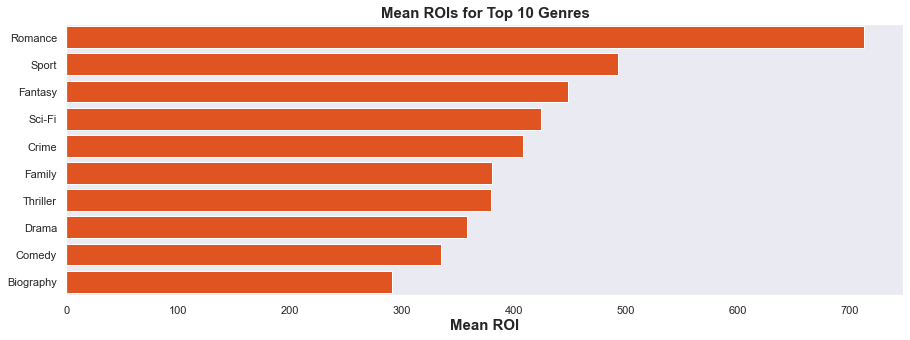

In [1074]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns_plot = sns.barplot(x=analysis_genres1['mean'][:10],y=analysis_genres1.index[:10],color='orangered')
plt.ylabel('')
plt.xlabel('Mean ROI', fontweight= "bold", fontsize=15)
plt.title("Mean ROIs for Top 10 Genres", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Top 10 Genres.png");

In [1052]:
list_of_genres = analysis_genres1.index[:10]

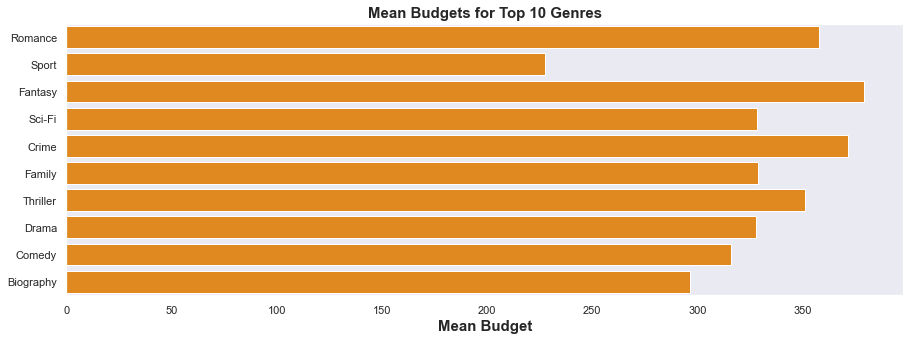

In [1077]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns_plot = sns.barplot(x=budget_genres1.loc[list_of_genres,'mean'],y=list_of_genres,color='darkorange')
plt.ylabel("")
plt.xlabel('Mean Budget', fontweight= "bold", fontsize=15)
plt.title("Mean Budgets for Top 10 Genres", fontweight= "bold", fontsize=15)
plt.grid(False)

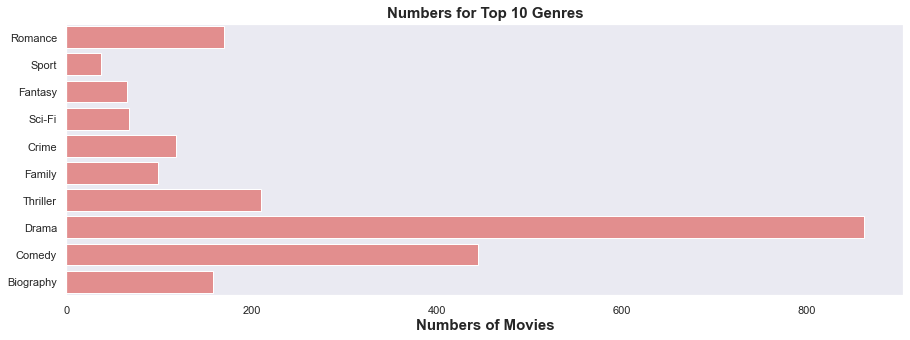

In [1115]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns_plot = sns.barplot(x=budget_genres1.loc[list_of_genres,'count'],y=list_of_genres,color='lightcoral')
plt.ylabel("")
plt.xlabel('Numbers of Movies', fontweight= "bold", fontsize=15)
plt.title("Numbers for Top 10 Genres", fontweight= "bold", fontsize=15)
plt.grid(False)

## Analyzing Studios

In [1038]:
studios=studios[['studio','movie','worldwide_gross','production_budget','ROI']]
studios.head()

studio                       movie  worldwide_gross  production_budget  \
0     BV                 Toy Story 3       1068879522          200000000   
1     WB                   Inception        835524642          160000000   
2   P/DW         Shrek Forever After        756244673          165000000   
3   Sum.  The Twilight Saga: Eclipse        706102828           68000000   
4   Par.                  Iron Man 2        621156389          170000000   

          ROI  
0  434.439761  
1  422.202901  
2  358.330105  
3  938.386512  
4  265.386111

In [1118]:
studios['studio'].value_counts()

Uni.    117
Fox     110
WB      102
Par.     74
Sony     74
       ... 
PH        1
ELS       1
CE        1
DR        1
RLJ       1
Name: studio, Length: 99, dtype: int64

In [1108]:
analysis_studio = studios.groupby(['studio'])['ROI'].describe()
analysis_studio1=analysis_studio.sort_values(by=['mean'], ascending=False)
analysis_studio1= analysis_studio1[analysis_studio1['count'] >= 10]
analysis_studio1.head(10)

count         mean          std         min         25%         50%  \
studio                                                                         
WB (NL)   37.0  1649.593358  6794.845183  -22.018937  119.199703  284.146742   
FD        10.0  1031.694273  2173.007680  -94.285714  -16.326216   63.110477   
Uni.     117.0   578.390730  1003.873035  -81.361270   71.678526  219.432563   
Par.      74.0   571.673832  1444.417990  -96.607567   81.567221  173.374483   
TriS      18.0   491.725761   604.618547   35.586291  129.985224  345.646797   
Wein.     41.0   368.099411   470.184878  -84.914620   62.687947  173.178720   
LGF       61.0   354.807568   625.893374  -75.253886   61.102523  154.136979   
FoxS      47.0   336.451831   507.189814 -100.000000   -2.546609   89.136750   
A24       21.0   324.242218   615.622461  -69.312162  -25.378571  176.678040   
LG/S      31.0   300.621005   623.842571 -100.000000   17.247362  154.116670   

                75%           max  
studio                             
WB (NL)  506.907431  41556.474000  
FD       403.974274   6558.059067  
Uni.     668.101646   6336.419800  
Par.     350.102332  10075.949000  
TriS     545.226334   2365.841300  
Wein.    490.084993   1849.960556  
LGF      322.261705   3798.105556  
FoxS     454.109827   2448.205462  
A24      464.766200   2669.782000  
LG/S     284.895127   2824.260233

In [1109]:
budget_studios = studios.groupby(['studio'])['production_budget'].describe()
budget_studios1=budget_studios.sort_values(by=['mean'], ascending=False)
budget_studios1= budget_studios1[budget_studios1['count'] >= 10]
budget_studios1.head(10)

count          mean           std         min          25%  \
studio                                                                
P/DW      10.0  1.334000e+08  4.622457e+07  40000000.0  130000000.0   
BV        72.0  1.312611e+08  9.018075e+07   8000000.0   39750000.0   
WB       102.0  8.036961e+07  6.696650e+07   1000000.0   35000000.0   
Fox      110.0  7.050455e+07  4.719147e+07   5000000.0   32250000.0   
Sony      74.0  6.825000e+07  5.176490e+07   8000000.0   35500000.0   
Par.      74.0  6.445946e+07  6.135305e+07   1000000.0   14250000.0   
WB (NL)   37.0  5.807027e+07  6.750565e+07    100000.0   20000000.0   
Uni.     117.0  5.639060e+07  5.297051e+07   1000000.0   21000000.0   
LG/S      31.0  5.349516e+07  4.067525e+07    850000.0   22500000.0   
STX       15.0  3.560667e+07  4.189846e+07   2000000.0   17850000.0   

                 50%          75%          max  
studio                                          
P/DW     145000000.0  161250000.0  195000000.0  
BV       150000000.0  185625000.0  410600000.0  
WB        51500000.0  121250000.0  300000000.0  
Fox       58000000.0  107250000.0  200000000.0  
Sony      55000000.0   80000000.0  300000000.0  
Par.      42500000.0  105000000.0  217000000.0  
WB (NL)   35000000.0   52000000.0  250000000.0  
Uni.      40000000.0   70000000.0  250000000.0  
LG/S      40000000.0   77500000.0  156000000.0  
STX       30000000.0   35000000.0  180000000.0

That scientific notation is distracting, so I'm going to divide by a hundred thousand and make things easier

In [1110]:
budget_studios1[budget_studios1.columns[1:3]] = budget_studios[budget_studios1.columns[1:3]].apply(lambda x: x/100000)
budget_studios1.head(10)

count         mean         std         min          25%          50%  \
studio                                                                          
P/DW      10.0  1334.000000  462.245726  40000000.0  130000000.0  145000000.0   
BV        72.0  1312.611111  901.807505   8000000.0   39750000.0  150000000.0   
WB       102.0   803.696078  669.665023   1000000.0   35000000.0   51500000.0   
Fox      110.0   705.045455  471.914651   5000000.0   32250000.0   58000000.0   
Sony      74.0   682.500000  517.648959   8000000.0   35500000.0   55000000.0   
Par.      74.0   644.594595  613.530518   1000000.0   14250000.0   42500000.0   
WB (NL)   37.0   580.702703  675.056535    100000.0   20000000.0   35000000.0   
Uni.     117.0   563.905983  529.705139   1000000.0   21000000.0   40000000.0   
LG/S      31.0   534.951613  406.752471    850000.0   22500000.0   40000000.0   
STX       15.0   356.066667  418.984566   2000000.0   17850000.0   30000000.0   

                 75%          max  
studio                             
P/DW     161250000.0  195000000.0  
BV       185625000.0  410600000.0  
WB       121250000.0  300000000.0  
Fox      107250000.0  200000000.0  
Sony      80000000.0  300000000.0  
Par.     105000000.0  217000000.0  
WB (NL)   52000000.0  250000000.0  
Uni.      70000000.0  250000000.0  
LG/S      77500000.0  156000000.0  
STX       35000000.0  180000000.0

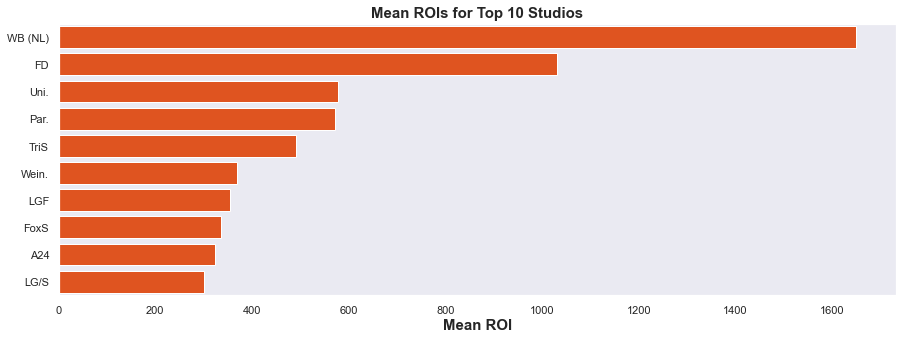

In [1111]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns_plot = sns.barplot(x=analysis_studio1['mean'][:10],y=analysis_studio1.index[:10],color='orangered')
plt.ylabel("")
plt.xlabel('Mean ROI', fontweight= "bold", fontsize=15)
plt.title("Mean ROIs for Top 10 Studios", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Top 10 Studios.png");

In [1112]:
#i am going to compare this 10 studios by budget to make some recommendation. I
list_of_studios=list(analysis_studio1.index[:10])

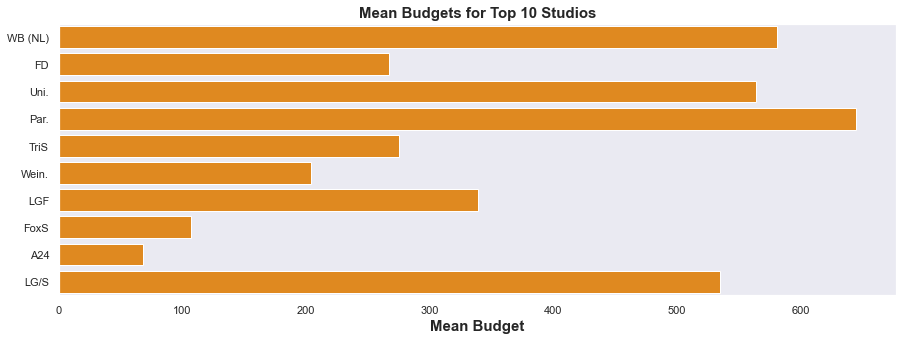

In [1113]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns_plot = sns.barplot(x=budget_studios1.loc[list_of_studios,'mean'],y=list_of_studios,color='darkorange')
plt.ylabel("")
plt.xlabel('Mean Budget', fontweight= "bold", fontsize=15)
plt.title("Mean Budgets for Top 10 Studios", fontweight= "bold", fontsize=15)
plt.grid(False)

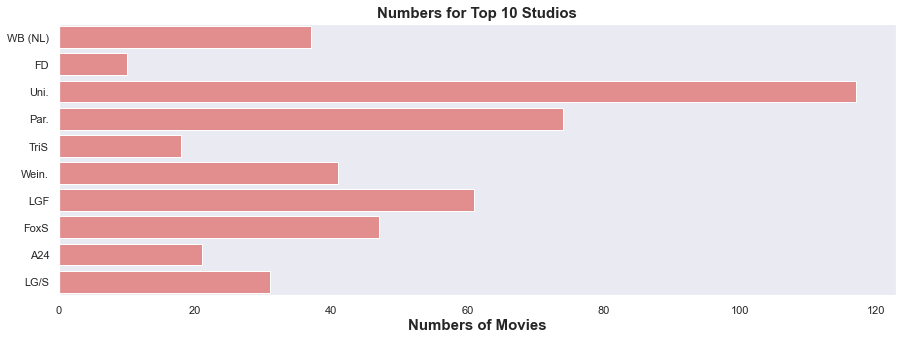

In [1114]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns_plot = sns.barplot(x=budget_studios1.loc[list_of_studios,'count'],y=list_of_studios,color='lightcoral')
plt.ylabel("")
plt.xlabel('Numbers of Movies', fontweight= "bold", fontsize=15)
plt.title("Numbers for Top 10 Studios", fontweight= "bold", fontsize=15)
plt.grid(False)

## Analyzing Directors

In [1103]:
directors1.head()

tconst  directors    writers primary_title original_title  start_year  \
0  tt6857112  nm0938939  nm1443502            Us             Us        2019   
1  tt2708782  nm4409800  nm0429634            Us             Vi        2013   
2  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   
3  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   
4  tt2184339  nm9598715  nm0218621     The Purge      The Purge        2013   

   runtime_minutes  genres  ordering     nconst  ...    primary_name  \
0            116.0   Drama       6.0  nm0089658  ...      Jason Blum   
1             92.0  Family       9.0  nm1079275  ...  Lars Gustafson   
2             85.0  Horror       7.0  nm0089658  ...      Jason Blum   
3             85.0  Horror       5.0  nm0218621  ...  James DeMonaco   
4             85.0  Horror       9.0  nm0298181  ...     Brad Fuller   

  birth_year death_year primary_profession  \
0     1969.0        NaN           director   
1     1974.0        NaN           director   
2     1969.0        NaN           director   
3     1969.0        NaN           director   
4        NaN        NaN           director   

                          known_for_titles  release_year      movie  \
0  tt1179904,tt7349662,tt2582802,tt5052448          2019         Us   
1  tt8338100,tt2309405,tt1859522,tt3580332          2019         Us   
2  tt1179904,tt7349662,tt2582802,tt5052448          2013  The Purge   
3  tt2184339,tt2975578,tt6133466,tt4094724          2013  The Purge   
4  tt1291150,tt6133466,tt2436386,tt6644200          2013  The Purge   

  worldwide_gross  production_budget          ROI  
0       254210310           20000000  1171.051550  
1       254210310           20000000  1171.051550  
2        91266581            3000000  2942.219367  
3        91266581            3000000  2942.219367  
4        91266581            3000000  2942.219367  

[5 rows x 23 columns]

In [1102]:
directors2=directors1[['primary_name','movie','death_year','worldwide_gross','production_budget','ROI']]
directors2=directors2.rename(columns={"primary_name":"director"})
directors2.head()

director      movie  death_year  worldwide_gross  production_budget  \
0      Jason Blum         Us         NaN        254210310           20000000   
1  Lars Gustafson         Us         NaN        254210310           20000000   
2      Jason Blum  The Purge         NaN         91266581            3000000   
3  James DeMonaco  The Purge         NaN         91266581            3000000   
4     Brad Fuller  The Purge         NaN         91266581            3000000   

           ROI  
0  1171.051550  
1  1171.051550  
2  2942.219367  
3  2942.219367  
4  2942.219367

In [1093]:
directors2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3790 entries, 0 to 3789
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   director           3790 non-null   object 
 1   movie              3790 non-null   object 
 2   death_year         54 non-null     float64
 3   worldwide_gross    3790 non-null   int64  
 4   production_budget  3790 non-null   int64  
 5   ROI                3790 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 207.3+ KB


In [1092]:
directors2['death_year'].value_counts()

2016.0    13
2017.0     8
2015.0     8
2008.0     3
2018.0     3
1996.0     2
2013.0     2
2014.0     2
2012.0     1
1973.0     1
1963.0     1
2009.0     1
1968.0     1
2000.0     1
1993.0     1
2010.0     1
1952.0     1
1919.0     1
2003.0     1
2011.0     1
1999.0     1
Name: death_year, dtype: int64

In [1100]:
directors3 = directors2[directors2['death_year'].isnull()]
directors3

director           movie  death_year  worldwide_gross  \
0          Jason Blum              Us         NaN        254210310   
1      Lars Gustafson              Us         NaN        254210310   
2          Jason Blum       The Purge         NaN         91266581   
3      James DeMonaco       The Purge         NaN         91266581   
4         Brad Fuller       The Purge         NaN         91266581   
...               ...             ...         ...              ...   
3785  Sati Janibekyan   Head of State         NaN         38283765   
3786      Kana Yamada    Midnight Run         NaN         81613606   
3787  Mihajlo Obrenov         Contact         NaN        165900000   
3788       Annie Laks  The Guilt Trip         NaN         41294674   
3789   Logan Williams        Aberdeen         NaN            64148   

      production_budget          ROI  
0              20000000  1171.051550  
1              20000000  1171.051550  
2               3000000  2942.219367  
3               3000000  2942.219367  
4               3000000  2942.219367  
...                 ...          ...  
3785           35200000     8.760696  
3786           30000000   172.045353  
3787           90000000    84.333333  
3788           40000000     3.236685  
3789            6500000   -99.013108  

[3736 rows x 6 columns]

I was going to filtre for the directors who are still alive to make recommendation on directors.But unfurtunately there was no enough data for death year. There was only 54 death_year datas in about 3790 director datas.

In [937]:

analysis_director = directors2.groupby(['director'])['ROI'].describe()
analysis_director1=analysis_director.sort_values(by=['mean'], ascending=False)
analysis_director1= analysis_director1[analysis_director1['count'] >= 5]
analysis_director1.head(10)

count         mean          std         min  \
director                                                              
Jason Blum               42.0  2635.409120  6414.871771 -100.000000   
Christopher Landon        7.0  2478.475895  1993.852689    3.699033   
Jackie Earle Haley        5.0  2285.544552  4292.296792  -94.475086   
Brad Fuller               7.0  1446.511655   891.978724  174.245308   
Cate Blanchett           12.0   978.808662  2527.336689  -14.396524   
Christopher Meledandri    5.0   727.657497   613.498774   41.689370   
Shailene Woodley          6.0   612.474421   947.724450  -29.238164   
Robert Mark Kamen         6.0   572.395146   361.460574   80.738155   
Jada Pinkett Smith        5.0   545.275353   366.102664   93.461281   
Teresa Palmer             7.0   533.286190  1043.463475  -60.123137   

                                25%          50%          75%           max  
director                                                                     
Jason Blum               468.861017  1105.832397  2563.494386  41556.474000  
Christopher Landon      1165.601290  2400.205200  3398.578360   5817.067733  
Jackie Earle Haley        68.910110   236.370346  1316.917389   9900.000000  
Brad Fuller             1018.024808  1139.276456  1916.895420   2942.219367  
Cate Blanchett           124.491737   290.378425   393.579752   8989.359138  
Christopher Meledandri   199.456497   745.939719  1183.180046   1468.021855  
Shailene Woodley          93.234919   200.700764   639.335122   2459.723617  
Robert Mark Kamen        308.262893   661.094779   769.471011   1035.194475  
Jada Pinkett Smith       403.165546   415.118118   779.437345   1035.194475  
Teresa Palmer             31.473021   248.049825   303.000199   2876.130200

In [1041]:
budget_director = directors2.groupby(['director'])['production_budget'].describe()
budget_director1=budget_director.sort_values(by=['mean'], ascending=False)
budget_director1= budget_director1[budget_director1['count'] >= 5]
budget_director1.head(10)

count          mean           std          min  \
director                                                            
Christopher Nolan    5.0  1.950000e+08  5.350234e+07  150000000.0   
Kevin Feige          7.0  1.850857e+08  8.283951e+07   60000000.0   
Michael Giacchino    8.0  1.267500e+08  8.161714e+07    8000000.0   
Michael Green        6.0  1.243333e+08  5.789531e+07   55000000.0   
Dan Fogler           5.0  1.208000e+08  7.956570e+07   19000000.0   
Chris Hemsworth     15.0  1.166200e+08  9.878681e+07    7000000.0   
Darren Lemke         6.0  1.121667e+08  6.292986e+07   35000000.0   
Greg Berlanti        5.0  1.096000e+08  8.136830e+07   10000000.0   
Joe Roth             8.0  1.082500e+08  8.625833e+07    3000000.0   
Hugh Jackman        10.0  1.049000e+08  5.481372e+07   23000000.0   

                           25%          50%          75%          max  
director                                                               
Christopher Nolan  160000000.0  165000000.0  225000000.0  275000000.0  
Kevin Feige        152500000.0  175000000.0  212500000.0  330600000.0  
Michael Giacchino   45500000.0  172500000.0  184250000.0  200000000.0  
Michael Green       85750000.0  112000000.0  170500000.0  200000000.0  
Dan Fogler          55000000.0  150000000.0  180000000.0  200000000.0  
Chris Hemsworth     36500000.0  100000000.0  160000000.0  330600000.0  
Darren Lemke        64750000.0  110000000.0  157500000.0  195000000.0  
Greg Berlanti       38000000.0  150000000.0  150000000.0  200000000.0  
Joe Roth            22000000.0  127500000.0  177500000.0  200000000.0  
Hugh Jackman        57750000.0  112500000.0  140500000.0  200000000.0

In [1101]:
budget_director1[budget_director1.columns[1:3]] = budget_director[budget_director1.columns[1:3]
                                                                 ].apply(lambda x: x/100000)
budget_director1.head(10)

count         mean         std          min          25%  \
director                                                                      
Christopher Nolan    5.0  1950.000000  535.023364  150000000.0  160000000.0   
Kevin Feige          7.0  1850.857143  828.395121   60000000.0  152500000.0   
Michael Giacchino    8.0  1267.500000  816.171376    8000000.0   45500000.0   
Michael Green        6.0  1243.333333  578.953078   55000000.0   85750000.0   
Dan Fogler           5.0  1208.000000  795.656961   19000000.0   55000000.0   
Chris Hemsworth     15.0  1166.200000  987.868138    7000000.0   36500000.0   
Darren Lemke         6.0  1121.666667  629.298551   35000000.0   64750000.0   
Greg Berlanti        5.0  1096.000000  813.682985   10000000.0   38000000.0   
Joe Roth             8.0  1082.500000  862.583329    3000000.0   22000000.0   
Hugh Jackman        10.0  1049.000000  548.137250   23000000.0   57750000.0   

                           50%          75%          max  
director                                                  
Christopher Nolan  165000000.0  225000000.0  275000000.0  
Kevin Feige        175000000.0  212500000.0  330600000.0  
Michael Giacchino  172500000.0  184250000.0  200000000.0  
Michael Green      112000000.0  170500000.0  200000000.0  
Dan Fogler         150000000.0  180000000.0  200000000.0  
Chris Hemsworth    100000000.0  160000000.0  330600000.0  
Darren Lemke       110000000.0  157500000.0  195000000.0  
Greg Berlanti      150000000.0  150000000.0  200000000.0  
Joe Roth           127500000.0  177500000.0  200000000.0  
Hugh Jackman       112500000.0  140500000.0  200000000.0

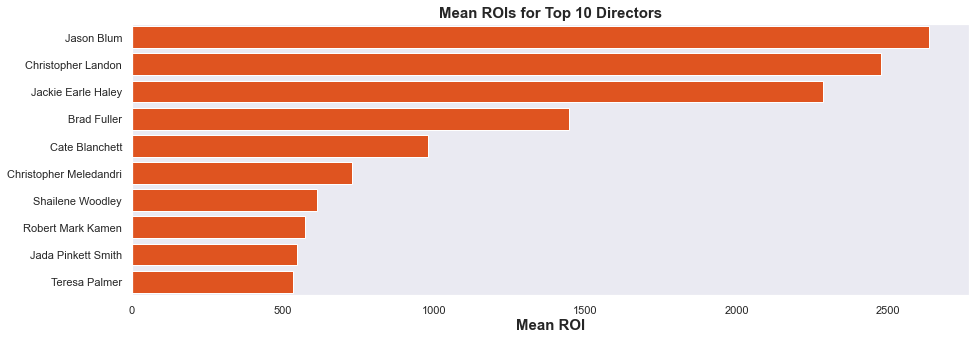

In [1002]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns_plot = sns.barplot(x=analysis_director1['mean'][:10],y=analysis_director1.index[:10],color='orangered')
plt.ylabel("")
plt.xlabel('Mean ROI', fontweight= "bold", fontsize=15)
plt.title("Mean ROIs for Top 10 Directors", fontweight= "bold", fontsize=15)
plt.grid(False)
sns_plot.figure.savefig("Top 10 Directors.png");

In [1045]:
#i am going to compare this 10 directors by budget to make some recommendation.
list_of_directors=list(analysis_director1.index[:10])

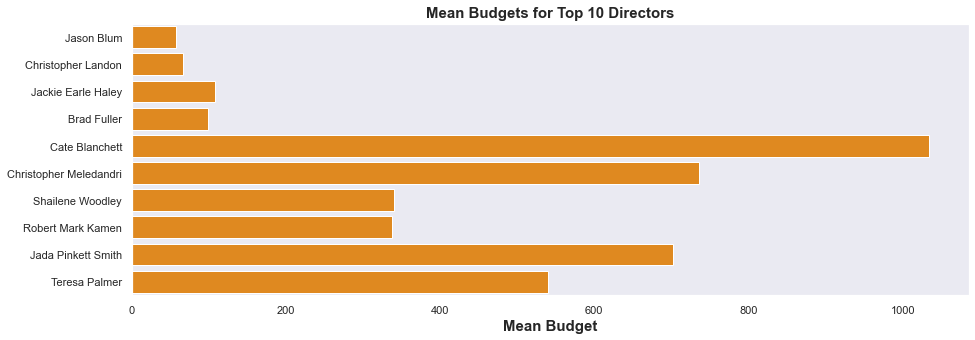

In [1079]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns_plot = sns.barplot(x=budget_director1.loc[list_of_directors,'mean'],y=list_of_directors,color='darkorange')
plt.ylabel("")
plt.xlabel('Mean Budget', fontweight= "bold", fontsize=15)
plt.title("Mean Budgets for Top 10 Directors", fontweight= "bold", fontsize=15)
plt.grid(False)

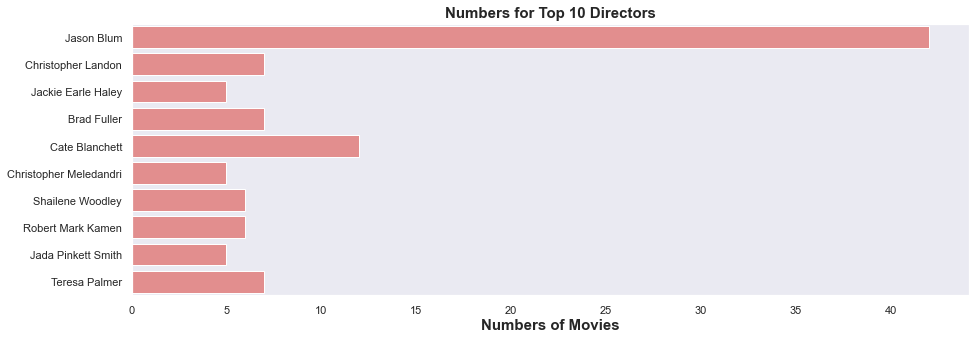

In [1116]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
sns_plot = sns.barplot(x=budget_director1.loc[list_of_directors,'count'],y=list_of_directors,color='lightcoral')
plt.ylabel("")
plt.xlabel('Numbers of Movies', fontweight= "bold", fontsize=15)
plt.title("Numbers for Top 10 Directors", fontweight= "bold", fontsize=15)
plt.grid(False)